# Logistic Regression: Tumor Data and Student Data
Import all necessary libraries. (Note: Logistic Regression in sklearn is L2-regularized by default)

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ucimlrepo import fetch_ucirepo 

import pandas as pd
# import piplite
# await piplite.install('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score
from statistics import stdev, mean
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
features = breast_cancer_wisconsin_diagnostic.data.features 
targets = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

## Tumor Data Set

(398, 30)
(171, 30)
Training accuracy = 0.9974874371859297


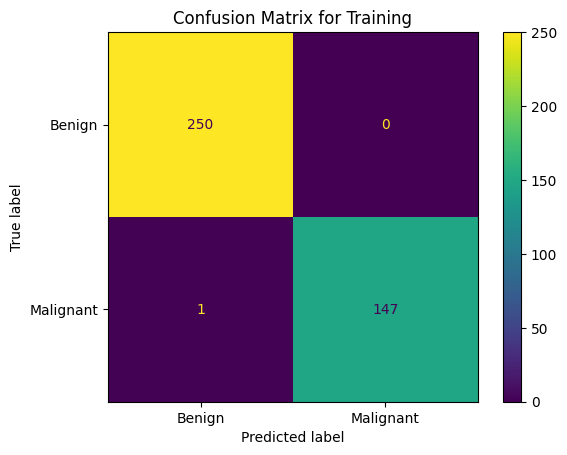

Training F1 Score: 0.9966101694915255
Training Precision Score: 1.0
Training Recall Score: 0.9932432432432432
Testing accuracy = 0.9473684210526315
Coefficients:  [-152.86872933] [[-2.43551191e+01  1.26402925e+00  1.24067172e+00  1.62104658e-01
   2.48579956e+02 -7.25435303e+01 -4.54414511e+01  1.62259165e+02
  -1.09824361e+02  2.25567978e+02  1.39665041e+02  4.89810822e+00
  -6.88767575e+00 -2.51229591e-01  6.27308412e+01 -2.94987046e+02
  -7.72062780e+01  1.75833313e+02 -4.51956801e+02 -5.06527641e+01
   4.19183567e+00  7.24207926e-02  1.32460621e+00 -6.90091516e-02
   8.21953263e+01 -3.88724708e+01  5.60797097e+01  2.01552845e+02
   7.58301868e+01  1.34258414e+02]]


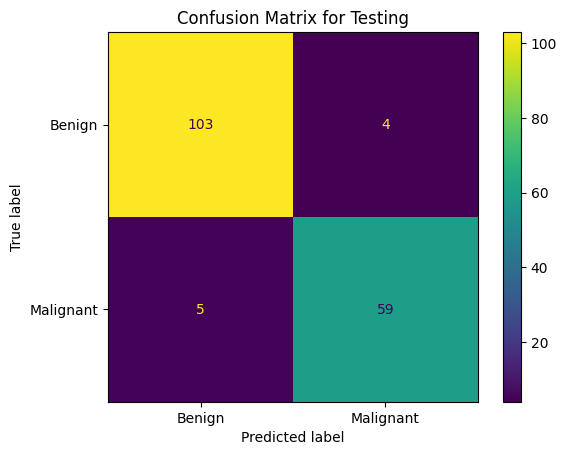

Testing F1 Score: 0.9291338582677166
Testing Precision Score: 0.9365079365079365
Testing Recall Score: 0.921875
[3.5240488262120775, 4.301035768166949, 24.298981038754903, 351.914129181653, 0.014064128137673618, 0.052812757932512194, 0.07971980870789348, 0.03880284485915361, 0.027414281336035715, 0.007060362795084459, 0.2773127329861039, 0.5516483926172023, 2.0218545540421076, 45.49100551613181, 0.0030025179438390656, 0.017908179325677388, 0.030186060322988408, 0.006170285174046869, 0.008266371528798399, 0.002646070967089195, 4.833241580469323, 6.146257623038319, 33.602542269036356, 569.356992669949, 0.022832429404835465, 0.15733648891374197, 0.2086242806081323, 0.06573234119594207, 0.061867467537518685, 0.018061267348893986]
[np.float64(14.127291739894552), np.float64(19.289648506151142), np.float64(91.96903339191564), np.float64(654.8891036906854), np.float64(0.09636028119507908), np.float64(0.1043409841827768), np.float64(0.0887993158172232), np.float64(0.04891914586994728), np.floa

In [87]:
# Extract the regressors and the target from the data frame
x, y = features.iloc[:,:].to_numpy(), targets.iloc[:,0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
print(X_train.shape)
print(X_test.shape)

model = LogisticRegression(solver='newton-cg', random_state=0,penalty=None).fit(X_train, y_train)
ypred_train = model.predict(X_train)
print(f"Training accuracy = {model.score(X_train, y_train)}")
cfm = confusion_matrix(y_train, ypred_train)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix for Training')
plt.show()
training_f1_score = f1_score(y_train, ypred_train, pos_label='M')
training_precision_score = precision_score(y_train, ypred_train, pos_label='M')
training_recall_score = recall_score(y_train, ypred_train, pos_label='M')
print(f"Training F1 Score: {training_f1_score}")
print(f"Training Precision Score: {training_precision_score}")
print(f"Training Recall Score: {training_recall_score}")

ypred = model.predict(X_test)
print(f"Testing accuracy = {model.score(X_test, y_test)}")
print(f"Coefficients: ", model.intercept_, model.coef_)
cfm = confusion_matrix(y_test, ypred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix for Testing')
plt.show()
testing_f1_score = f1_score(y_test, ypred, pos_label='M')
testing_precision_score = precision_score(y_test, ypred, pos_label='M')
testing_recall_score = recall_score(y_test, ypred, pos_label='M')
print(f"Testing F1 Score: {testing_f1_score}")
print(f"Testing Precision Score: {testing_precision_score}")
print(f"Testing Recall Score: {testing_recall_score}")

x_transpose = x.transpose()
std_list = []
mean_list = []
for i in range(x_transpose.shape[0]):
    std_list.append(stdev(x_transpose[i]))
    mean_list.append(mean(x_transpose[i]))
print(std_list)
print(mean_list)

normalized_coefficients = []
for i in range(len(model.coef_)):
    print(model.coef_[i], mean_list[i], std_list[i])
    normalized_coefficients.append((model.coef_[i] - mean_list[i]) / std_list[i])
print(f"Normalized coefficients: {normalized_coefficients}")
order = abs(np.array(normalized_coefficients)).argsort()
selected_columns = features.columns[order[0]]
print(f"Last values are most important: {selected_columns}")

Plot the logistic curve (by plotting probability estimates or scores).

In [88]:
# plt.scatter(x,y,color='b')
# x2 = np.linspace(1,8,200).reshape(-1,1)
# y2 = model.predict_proba(x2)
# plt.plot(x2,y2[:,1],color='k')
# plt.grid()
# plt.show()

## Student Data Set

In [89]:
# x = np.array([4.2,2.2,3.5,2.5,5.1,1.3,3.0,1.8,2.4,1.5]).reshape(-1,1); 
# y = np.array([1,0,1,1,1,0,0,0,1,0]);

# model = LogisticRegression(solver='newton-cg', random_state=0,penalty=None).fit(x, y)
# print(f"accuracy = {model.score(x, y)}")
# print(f"Coefficients: ", model.intercept_, model.coef_)
# cfm = confusion_matrix(y, model.predict(x))
# cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Fail", "Pass"])
# cm_display.plot()
# plt.title('Confusion Matrix')
# plt.show()

In [90]:
# plt.scatter(x,y,color='b')
# x2 = np.linspace(0,6).reshape(-1,1)
# y2 = model.predict_proba(x2)
# plt.plot(x2,y2[:,1],color='k')
# plt.grid()
# plt.show()

Generate the ROC curve for the Student Data Set.

AUC:  0.9422459112149533


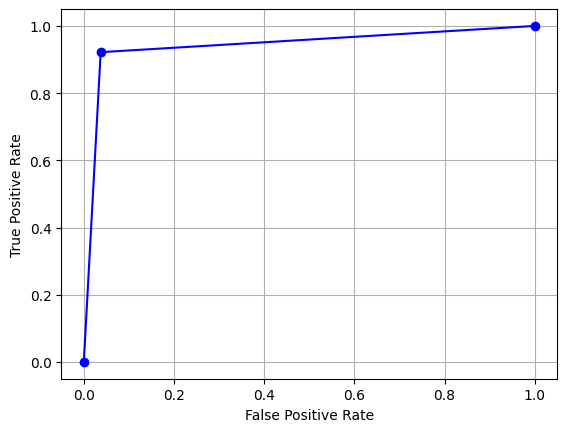

In [91]:
from sklearn import metrics

# Convert string labels to binary (1 for 'M', 0 for 'B')
y_test_bin = (y_test == 'M').astype(int)
ypred_bin = (ypred == 'M').astype(int)

fpr, tpr, thresholds = metrics.roc_curve(y_test_bin, ypred_bin)
print(f"AUC: ", metrics.roc_auc_score(y_test_bin, ypred_bin))
plt.plot(fpr, tpr, 'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

AUC:  0.9966216216216216


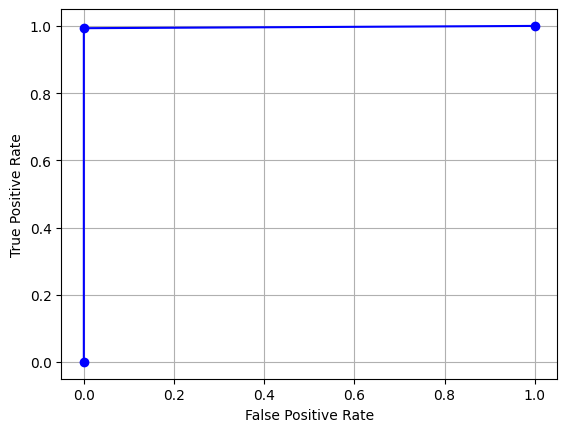

In [92]:
from sklearn import metrics

# Convert string labels to binary (1 for 'M', 0 for 'B')
y_train_bin = (y_train == 'M').astype(int)
ypred_train_bin = (ypred_train == 'M').astype(int)

fpr, tpr, thresholds = metrics.roc_curve(y_train_bin, ypred_train_bin)
print(f"AUC: ", metrics.roc_auc_score(y_train_bin, ypred_train_bin))
plt.plot(fpr, tpr, 'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()